In [44]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib ipympl

#%matplotlib inline

In [19]:
df = pd.read_csv('/home/walter/Work/data/2022-02-06-dataDCcycle.csv')
df
df.Time

0       2022-2-6T22:21:52
1       2022-2-6T22:22:52
2       2022-2-6T22:23:53
3       2022-2-6T22:24:53
4       2022-2-6T22:25:53
              ...        
3420    2022-2-9T07:53:42
3421    2022-2-9T07:54:42
3422    2022-2-9T07:55:43
3423    2022-2-9T07:56:43
3424    2022-2-9T07:57:43
Name: Time, Length: 3425, dtype: object

In [20]:
print(df.head())

                Time                      SerialNumber     A0  A0tempF   A1  \
0  2022-2-6T22:21:52  2251441C44100820F80BA000A0000057  149.0    73.09  508   
1  2022-2-6T22:22:52  2251441C44100820F80BA000A0000057  149.0    73.09  508   
2  2022-2-6T22:23:53  2251441C44100820F80BA000A0000057  149.0    73.09  508   
3  2022-2-6T22:24:53  2251441C44100820F80BA000A0000057  149.0    73.09  508   
4  2022-2-6T22:25:53  2251441C44100820F80BA000A0000057  149.0    73.09  508   

   A1volt   A2  A2volt   A3  A3volt  ...  D4  D5  D6  D7  D8  D9  D10  D11  \
0    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   
1    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   
2    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   
3    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   
4    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   

   D12  D13  
0    1    1  
1    1    1  
2    1    1  


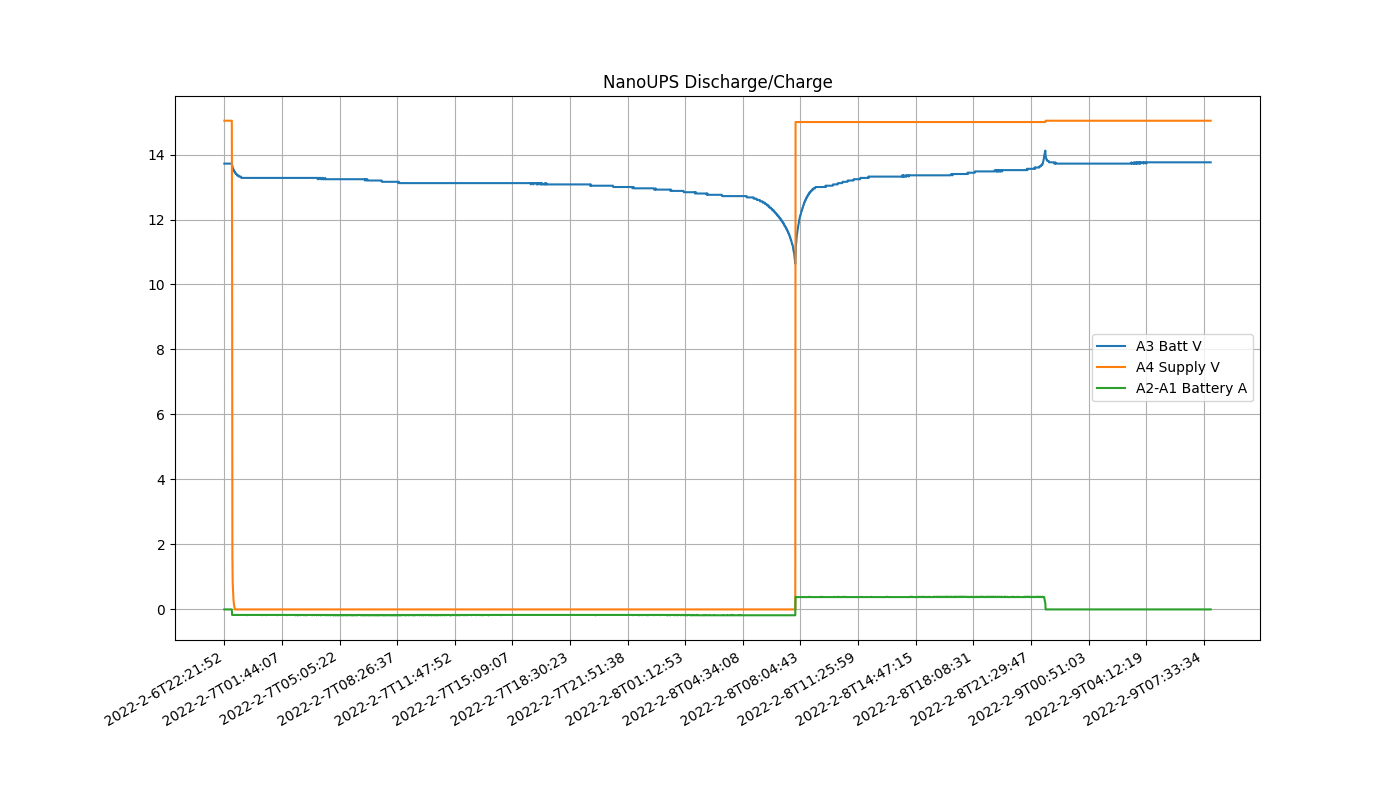

In [21]:
#plt.plot(df.Time, df.A3volt)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.plot(df.Time, df.A3volt, label='A3 Batt V')
ax.plot(df.Time, df.A4volt, label='A4 Supply V')
ax.plot(df.Time, df.A2volt - df.A1volt, label='A2-A1 Battery A')
ax.set_xticks(np.arange(0, len(df.Time)+1, 200))
# ax.set_xticks(ax.get_xticks()[::200])
plt.grid()
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("NanoUPS Discharge/Charge")
plt.show()

In [45]:
import requests
data = requests.get('https://staging-api.genulogd1.com/get-day-data?stationId=CCW1')\
                         .json()['data']['Items']
df2 = pd.DataFrame.from_dict(data)
dff = df2[df2['A0'].notna()].copy()
dff['A0'] = pd.to_numeric(dff['A0'],errors='coerce')
dff['A1'] = pd.to_numeric(dff['A1'],errors='coerce')
dff['A2'] = pd.to_numeric(dff['A2'],errors='coerce')
dff['A3'] = pd.to_numeric(dff['A3'],errors='coerce')
#print(dff.to_string())
dff

,D11,D10,remoteAddress,D13,epochTime,D12,D2,A0,D3,A1,...,D5,A3,D6,D7,D8,D9,stationId,upkey,Time,cdcTime
0,0,0,172.58.27.77,1,1646870853,0,0,74.71,1,277,...,1,0,1,1,0,0,CCW1,key1,2022-3-9T17:10:04,Thu Mar 10 2022 00:07:33 GMT+0000 (Coordinated...
1,0,0,172.58.27.77,1,1646871451,0,0,73.84,1,276,...,1,0,1,1,0,0,CCW1,key1,2022-3-9T17:20:02,Thu Mar 10 2022 00:17:31 GMT+0000 (Coordinated...
2,0,0,172.58.27.77,1,1646872059,0,0,72.96,1,276,...,1,0,1,1,0,0,CCW1,key1,2022-3-9T17:30:10,Thu Mar 10 2022 00:27:39 GMT+0000 (Coordinated...
3,0,0,172.58.27.77,1,1646872656,0,0,73.84,1,276,...,1,0,1,1,0,0,CCW1,key1,2022-3-9T17:40:07,Thu Mar 10 2022 00:37:36 GMT+0000 (Coordinated...
4,0,0,172.58.27.77,1,1646873254,0,0,72.08,1,276,...,1,0,1,1,0,0,CCW1,key1,2022-3-9T17:50:05,Thu Mar 10 2022 00:47:34 GMT+0000 (Coordinated...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1,0,172.58.27.64,1,1646978852,0,0,43.07,1,248,...,1,0,1,1,0,1,CCW1,key1,2022-3-10T23:10:03,Fri Mar 11 2022 06:07:32 GMT+0000 (Coordinated...
180,1,0,172.58.30.212,1,1646979450,0,0,43.07,1,248,...,1,0,1,1,0,1,CCW1,key1,2022-3-10T23:20:01,Fri Mar 11 2022 06:17:30 GMT+0000 (Coordinated...
181,1,0,172.58.27.187,1,1646980058,0,0,43.07,1,248,...,1,0,1,1,0,1,CCW1,key1,2022-3-10T23:30:09,Fri Mar 11 2022 06:27:38 GMT+0000 (Coordinated...
182,1,0,172.58.30.188,1,1646980656,0,0,43.07,1,248,...,1,0,1,1,0,1,CCW1,key1,2022-3-10T23:40:07,Fri Mar 11 2022 06:37:36 GMT+0000 (Coordinated...


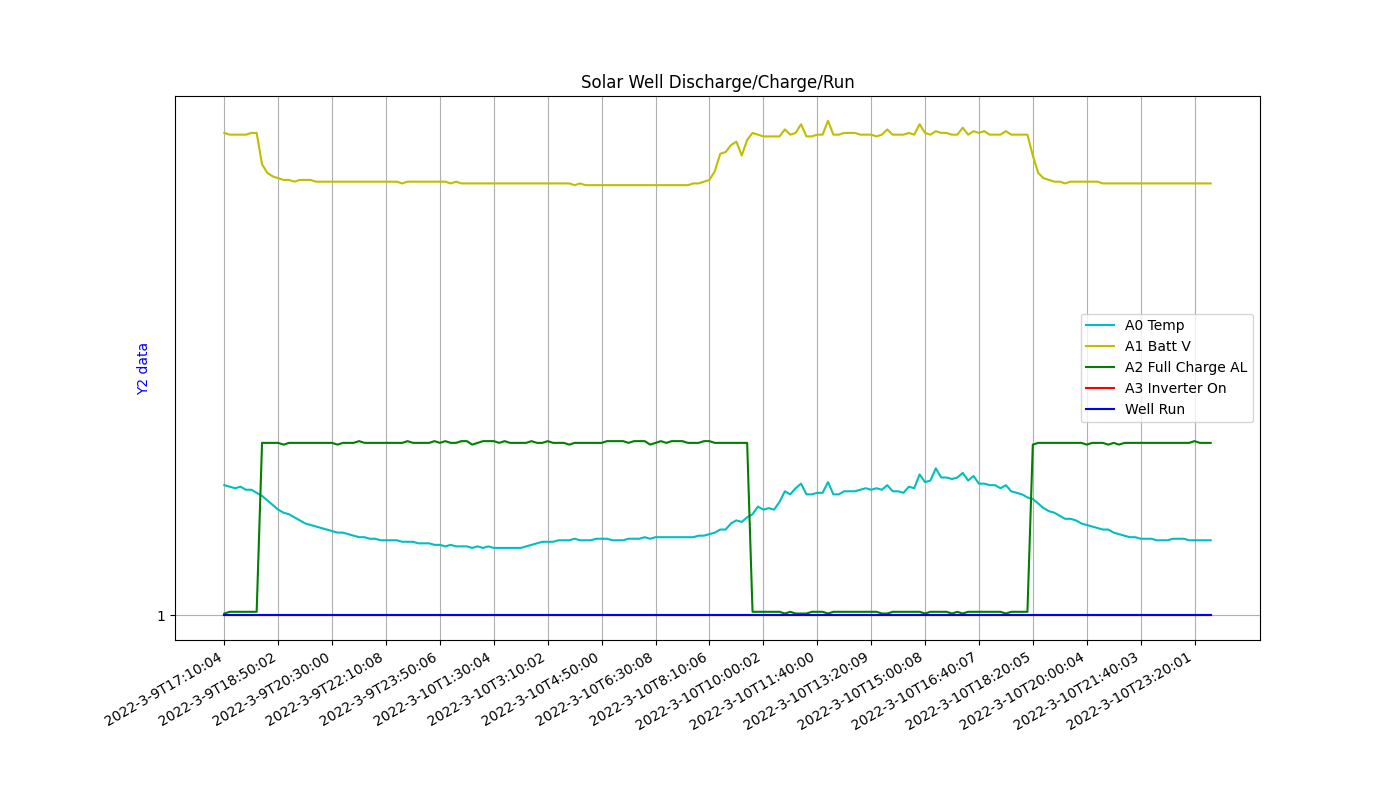

In [52]:
fig2 = plt.figure(figsize=(14, 8))
ax2 = fig2.add_subplot(111)
A0, = ax2.plot(dff.Time, dff.A0, '-c', label='A0 Temp')
A1, = ax2.plot(dff.Time, dff.A1, '-y', label='A1 Batt V')
A2, = ax2.plot(dff.Time, dff.A2, '-g', label='A2 Full Charge AL')
A3, = ax2.plot(dff.Time, dff.A3, '-r', label='A3 Inverter On')
D7, = ax2.plot(dff.Time, dff.D7, '-b', label='Well Run')
ax2.set_xticks(np.arange(0, len(dff.Time)+1, 10))

#ax2.set_xlabel('X data')
ax2.set_ylabel('A1', color='g')
ax2.set_ylabel('Y2 data', color='b')
ax2.legend() # , loc='upper right'
#ax2.legend(handles=[A1])
# ax.set_xticks(ax.get_xticks()[::200])
plt.grid()
#plt.legend()
plt.gcf().autofmt_xdate()
plt.title("Solar Well Discharge/Charge/Run")
plt.show()